In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/content/drive/MyDrive/Datasets MLAI/test_loan.csv')

In [3]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [4]:
data.shape

(367, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [6]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [7]:
data.Loan_ID.nunique()

367

In [8]:
#The feature Loan_ID can be dropped

In [9]:
data=data.drop('Loan_ID',axis=1)

In [10]:
#Data Visualization

<Axes: xlabel='Gender', ylabel='count'>

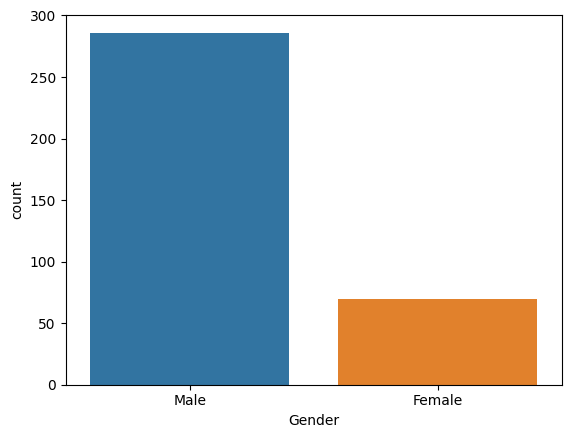

In [11]:
sns.countplot(data,x='Gender')

<Axes: xlabel='Married', ylabel='count'>

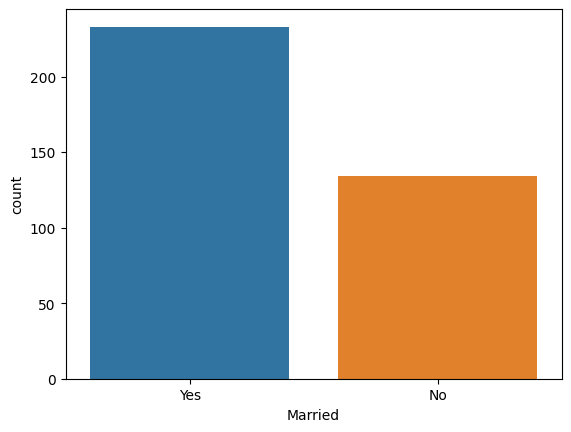

In [12]:
sns.countplot(data,x='Married')

<Axes: xlabel='Dependents', ylabel='count'>

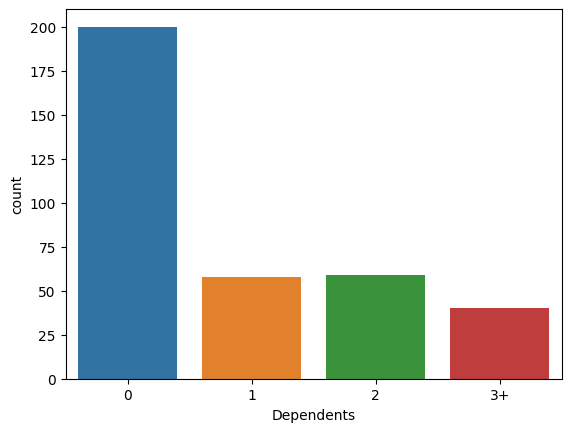

In [13]:
sns.countplot(data,x='Dependents')

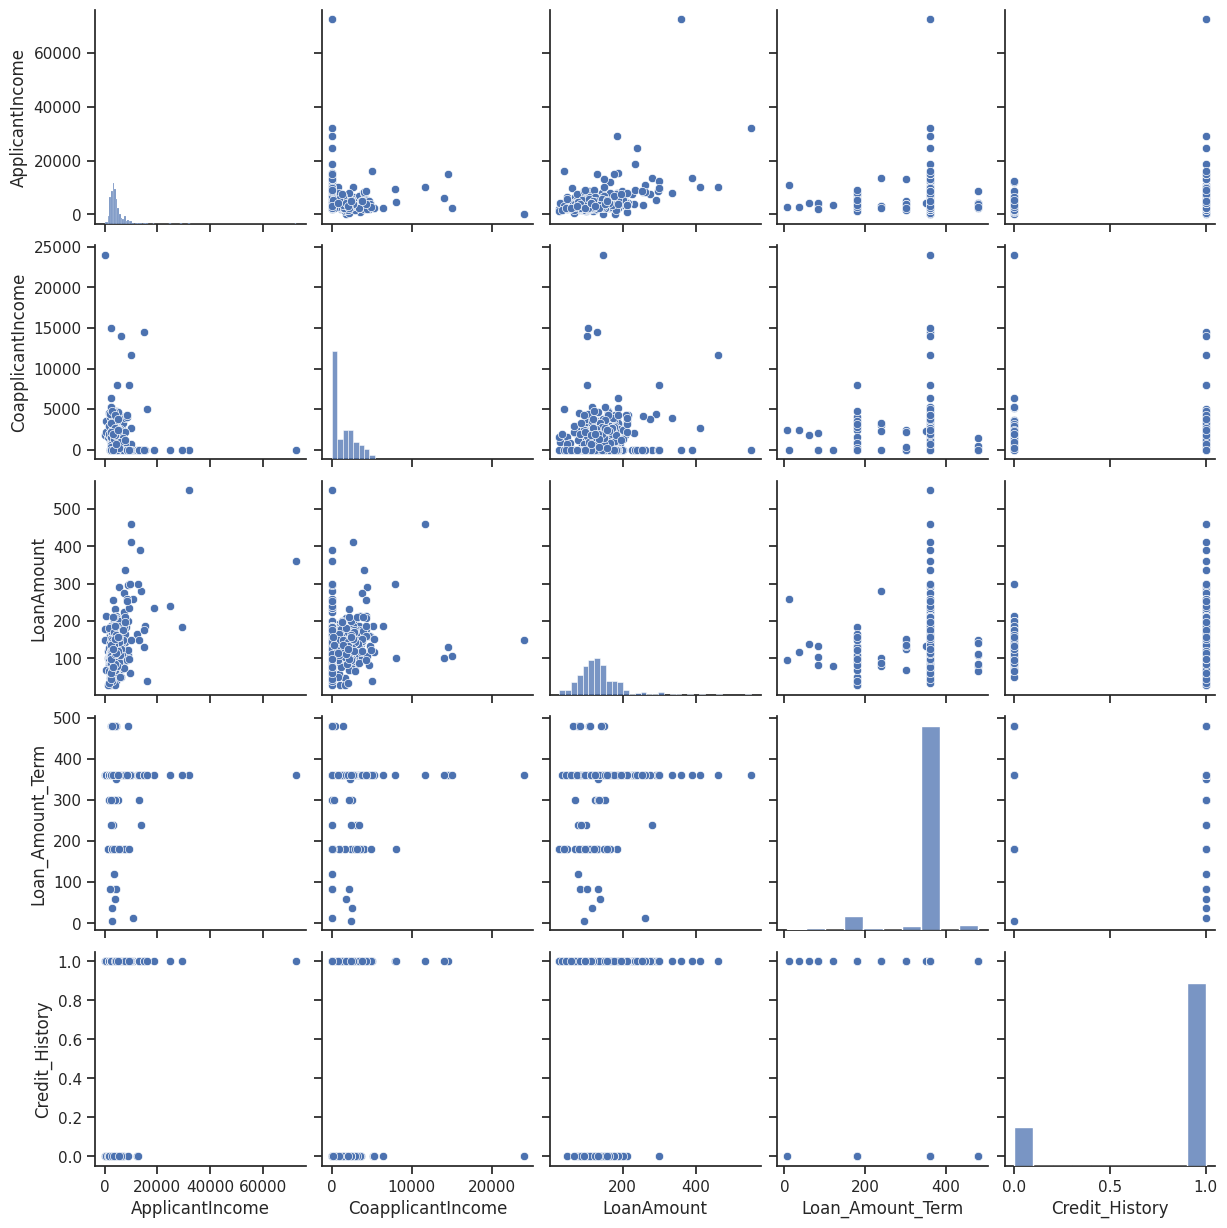

In [14]:
sns.set(style="ticks")
sns.pairplot(data)
plt.show()

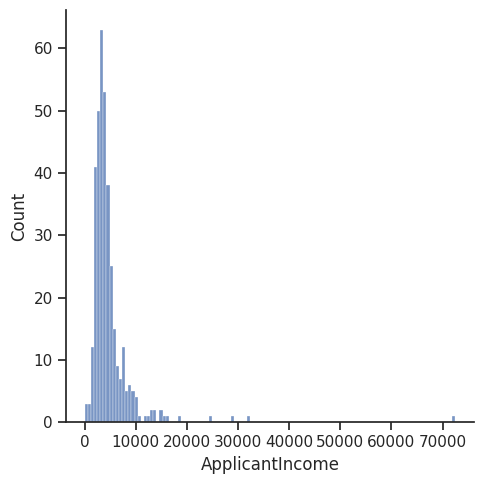

In [15]:
sns.displot(data['ApplicantIncome'])


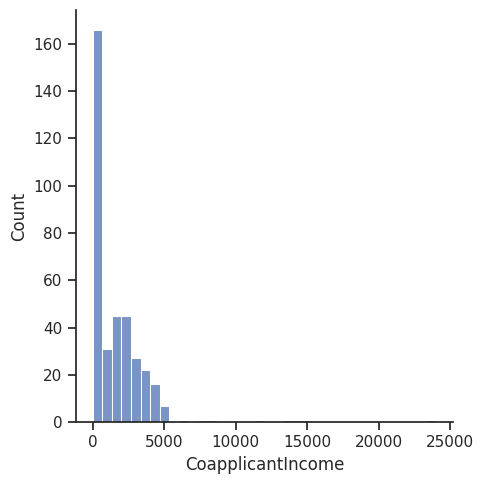

In [16]:
sns.displot(data['CoapplicantIncome'])

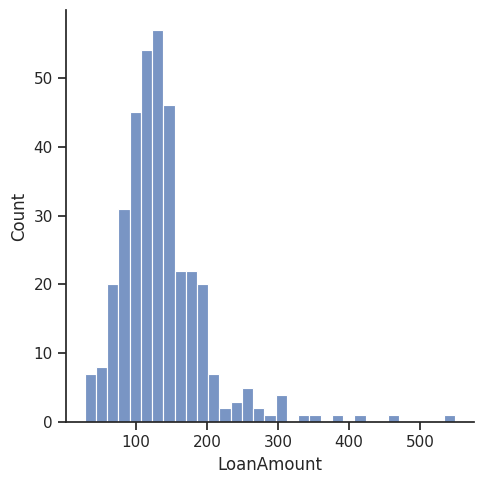

In [17]:
sns.displot(data['LoanAmount'])

In [18]:
#Handling Missing Values

In [19]:
data_categorical=data.select_dtypes(include='object') #separate categorical variables

In [20]:
data_categorical

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,Male,Yes,0,Graduate,No,Urban
1,Male,Yes,1,Graduate,No,Urban
2,Male,Yes,2,Graduate,No,Urban
3,Male,Yes,2,Graduate,No,Urban
4,Male,No,0,Not Graduate,No,Urban
...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,Urban
363,Male,Yes,0,Graduate,No,Urban
364,Male,No,0,Graduate,No,Semiurban
365,Male,Yes,0,Graduate,No,Rural


In [21]:
data_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Gender         356 non-null    object
 1   Married        367 non-null    object
 2   Dependents     357 non-null    object
 3   Education      367 non-null    object
 4   Self_Employed  344 non-null    object
 5   Property_Area  367 non-null    object
dtypes: object(6)
memory usage: 17.3+ KB


In [22]:
for i in data_categorical:
  mode_value=data[i].mode()[0]
  data_categorical[i]=data_categorical[i].fillna(mode_value) #filling the missing values in categorical variables with mode

In [23]:
data_numerical=data.select_dtypes([int,float])

In [24]:
data_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    367 non-null    int64  
 1   CoapplicantIncome  367 non-null    int64  
 2   LoanAmount         362 non-null    float64
 3   Loan_Amount_Term   361 non-null    float64
 4   Credit_History     338 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 14.5 KB


In [25]:
from sklearn.impute import KNNImputer
knn=KNNImputer(n_neighbors=5)
data_numerical=knn.fit_transform(data_numerical) #filling the missing values in numerical variables with KNN imputer

In [26]:
data_numerical

array([[5.720e+03, 0.000e+00, 1.100e+02, 3.600e+02, 1.000e+00],
       [3.076e+03, 1.500e+03, 1.260e+02, 3.600e+02, 1.000e+00],
       [5.000e+03, 1.800e+03, 2.080e+02, 3.600e+02, 1.000e+00],
       ...,
       [3.250e+03, 1.993e+03, 1.260e+02, 3.600e+02, 8.000e-01],
       [5.000e+03, 2.393e+03, 1.580e+02, 3.600e+02, 1.000e+00],
       [9.200e+03, 0.000e+00, 9.800e+01, 1.800e+02, 1.000e+00]])

In [27]:
data_numerical=pd.DataFrame(data_numerical) # converting array into dataframe

In [28]:
data_numerical

,0,1,2,3,4
0,5720.0,0.0,110.0,360.0,1.0
1,3076.0,1500.0,126.0,360.0,1.0
2,5000.0,1800.0,208.0,360.0,1.0
3,2340.0,2546.0,100.0,360.0,0.6
4,3276.0,0.0,78.0,360.0,1.0
...,...,...,...,...,...
362,4009.0,1777.0,113.0,360.0,1.0
363,4158.0,709.0,115.0,360.0,1.0
364,3250.0,1993.0,126.0,360.0,0.8
365,5000.0,2393.0,158.0,360.0,1.0


In [29]:
data_numerical.columns=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']

In [30]:
data=pd.concat([data_numerical,data_categorical],axis=1) #Concatenation of categorical features and numerical features

In [31]:
data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,5720.0,0.0,110.0,360.0,1.0,Male,Yes,0,Graduate,No,Urban
1,3076.0,1500.0,126.0,360.0,1.0,Male,Yes,1,Graduate,No,Urban
2,5000.0,1800.0,208.0,360.0,1.0,Male,Yes,2,Graduate,No,Urban
3,2340.0,2546.0,100.0,360.0,0.6,Male,Yes,2,Graduate,No,Urban
4,3276.0,0.0,78.0,360.0,1.0,Male,No,0,Not Graduate,No,Urban
...,...,...,...,...,...,...,...,...,...,...,...
362,4009.0,1777.0,113.0,360.0,1.0,Male,Yes,3+,Not Graduate,Yes,Urban
363,4158.0,709.0,115.0,360.0,1.0,Male,Yes,0,Graduate,No,Urban
364,3250.0,1993.0,126.0,360.0,0.8,Male,No,0,Graduate,No,Semiurban
365,5000.0,2393.0,158.0,360.0,1.0,Male,Yes,0,Graduate,No,Rural


In [32]:
data['Dependents']=data['Dependents'].str.replace('+','') #Replacing '+' in Dependent feature

<ipython-input-32-5206220c5d96>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Dependents']=data['Dependents'].str.replace('+','') #Replacing '+' in Dependent feature


In [33]:
data['Dependents'].dtypes

dtype('O')

In [34]:
data['Dependents']=data['Dependents'].astype(int) #Changing the datatype of Dependent feature into int

In [35]:
data['Dependents'].dtypes

dtype('int64')

In [36]:
data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,5720.0,0.0,110.0,360.0,1.0,Male,Yes,0,Graduate,No,Urban
1,3076.0,1500.0,126.0,360.0,1.0,Male,Yes,1,Graduate,No,Urban
2,5000.0,1800.0,208.0,360.0,1.0,Male,Yes,2,Graduate,No,Urban
3,2340.0,2546.0,100.0,360.0,0.6,Male,Yes,2,Graduate,No,Urban
4,3276.0,0.0,78.0,360.0,1.0,Male,No,0,Not Graduate,No,Urban
...,...,...,...,...,...,...,...,...,...,...,...
362,4009.0,1777.0,113.0,360.0,1.0,Male,Yes,3,Not Graduate,Yes,Urban
363,4158.0,709.0,115.0,360.0,1.0,Male,Yes,0,Graduate,No,Urban
364,3250.0,1993.0,126.0,360.0,0.8,Male,No,0,Graduate,No,Semiurban
365,5000.0,2393.0,158.0,360.0,1.0,Male,Yes,0,Graduate,No,Rural


In [37]:
#Outlier handling using Floor and Ceiling Method

<Axes: >

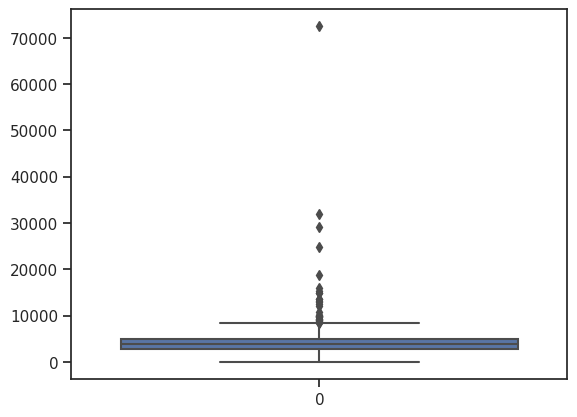

In [38]:
sns.boxplot(data['ApplicantIncome'])

<Axes: >

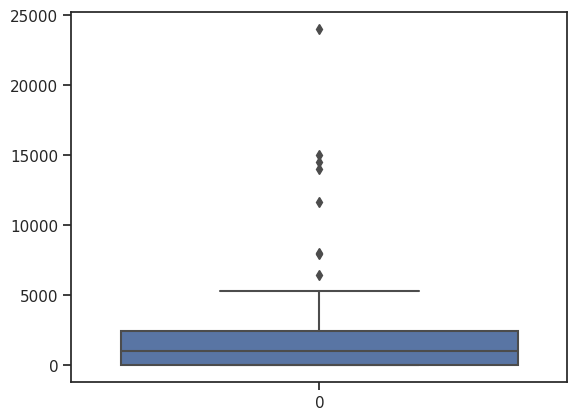

In [39]:
sns.boxplot(data['CoapplicantIncome'])

<Axes: >

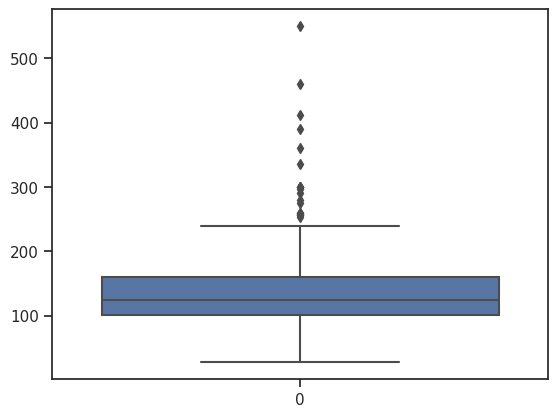

In [40]:
sns.boxplot(data['LoanAmount'])

In [41]:
ceiling_values = {'ApplicantIncome': 50000, 'CoapplicantIncome': 20000, 'LoanAmount': 500}
floor_values = {'ApplicantIncome': 0, 'CoapplicantIncome': 0, 'LoanAmount': 0} #Defining ceiling and floor values

In [42]:
for i in data.columns:
    if i in ceiling_values:
        ceiling = ceiling_values[i]
        floor = floor_values[i]
        data[i] = np.clip(data[i], floor, ceiling) #replacing outliers using ceiling and floor values

In [43]:
data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,5720.0,0.0,110.0,360.0,1.0,Male,Yes,0,Graduate,No,Urban
1,3076.0,1500.0,126.0,360.0,1.0,Male,Yes,1,Graduate,No,Urban
2,5000.0,1800.0,208.0,360.0,1.0,Male,Yes,2,Graduate,No,Urban
3,2340.0,2546.0,100.0,360.0,0.6,Male,Yes,2,Graduate,No,Urban
4,3276.0,0.0,78.0,360.0,1.0,Male,No,0,Not Graduate,No,Urban
...,...,...,...,...,...,...,...,...,...,...,...
362,4009.0,1777.0,113.0,360.0,1.0,Male,Yes,3,Not Graduate,Yes,Urban
363,4158.0,709.0,115.0,360.0,1.0,Male,Yes,0,Graduate,No,Urban
364,3250.0,1993.0,126.0,360.0,0.8,Male,No,0,Graduate,No,Semiurban
365,5000.0,2393.0,158.0,360.0,1.0,Male,Yes,0,Graduate,No,Rural


In [44]:
data.shape

(367, 11)

In [45]:
#distribution plot after outlier handling

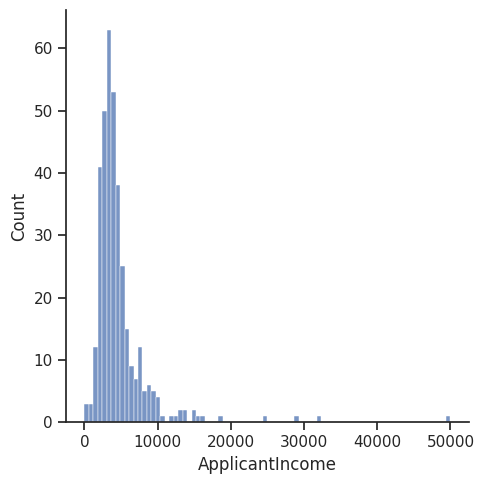

In [46]:
sns.displot(data['ApplicantIncome'])

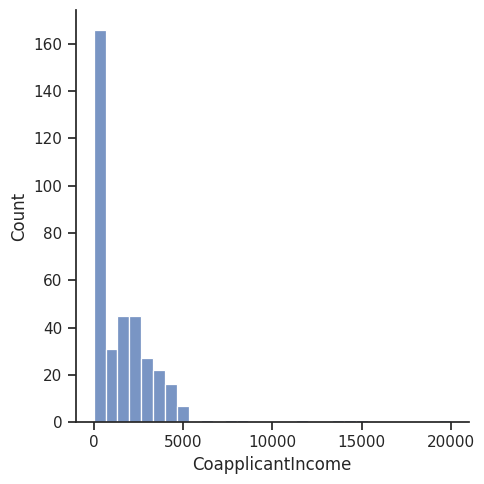

In [47]:
sns.displot(data['CoapplicantIncome'])

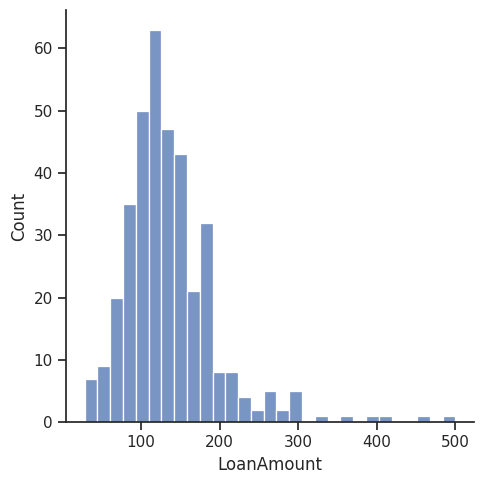

In [48]:
sns.displot(data['LoanAmount'])

In [49]:
#Encoding

In [50]:
data.Education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [51]:
data.Property_Area.unique()

array(['Urban', 'Semiurban', 'Rural'], dtype=object)

In [52]:
data.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender', 'Married', 'Dependents',
       'Education', 'Self_Employed', 'Property_Area'],
      dtype='object')

In [55]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])
data['Married']=le.fit_transform(data['Married'])
data['Education']=le.fit_transform(data['Education'])
data['Self_Employed']=le.fit_transform(data['Self_Employed'])  #Label Encoding


In [57]:
data=pd.get_dummies(data)                         #One hot encoding remaining columns

In [58]:
data_categorical

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,Male,Yes,0,Graduate,No,Urban
1,Male,Yes,1,Graduate,No,Urban
2,Male,Yes,2,Graduate,No,Urban
3,Male,Yes,2,Graduate,No,Urban
4,Male,No,0,Not Graduate,No,Urban
...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,Urban
363,Male,Yes,0,Graduate,No,Urban
364,Male,No,0,Graduate,No,Semiurban
365,Male,Yes,0,Graduate,No,Rural


In [59]:
#Feature Scaling

In [60]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
data=std.fit_transform(data)        # Standard Scaler

In [61]:
data

array([[ 0.23587589, -0.69787749, -0.43900633, ..., -0.65847836,
        -0.67981718,  1.27335328],
       [-0.40325494, -0.0262725 , -0.17507755, ..., -0.65847836,
        -0.67981718,  1.27335328],
       [ 0.06183119,  0.10804849,  1.17755744, ..., -0.65847836,
        -0.67981718,  1.27335328],
       ...,
       [-0.36119413,  0.19446167, -0.17507755, ..., -0.65847836,
         1.47098372, -0.78532801],
       [ 0.06183119,  0.37355633,  0.35278001, ...,  1.51865279,
        -0.67981718, -0.78532801],
       [ 1.07709195, -0.69787749, -0.63695292, ...,  1.51865279,
        -0.67981718, -0.78532801]])

In [62]:
data=pd.DataFrame(data)

In [63]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.235876,-0.697877,-0.439006,0.273374,0.468445,0.485479,0.758358,-0.758222,-0.544812,-0.334845,-0.658478,-0.679817,1.273353
1,-0.403255,-0.026273,-0.175078,0.273374,0.468445,0.485479,0.758358,0.181871,-0.544812,-0.334845,-0.658478,-0.679817,1.273353
2,0.061831,0.108048,1.177557,0.273374,0.468445,0.485479,0.758358,1.121964,-0.544812,-0.334845,-0.658478,-0.679817,1.273353
3,-0.581167,0.442060,-0.603962,0.273374,-0.619652,0.485479,0.758358,1.121964,-0.544812,-0.334845,-0.658478,-0.679817,1.273353
4,-0.354909,-0.697877,-0.966864,0.273374,0.468445,0.485479,-1.318638,-0.758222,1.835497,-0.334845,-0.658478,-0.679817,1.273353
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,-0.177722,0.097751,-0.389520,0.273374,0.468445,0.485479,0.758358,2.062056,1.835497,2.986456,-0.658478,-0.679817,1.273353
363,-0.141704,-0.380432,-0.356529,0.273374,0.468445,0.485479,0.758358,-0.758222,-0.544812,-0.334845,-0.658478,-0.679817,1.273353
364,-0.361194,0.194462,-0.175078,0.273374,-0.075603,0.485479,-1.318638,-0.758222,-0.544812,-0.334845,-0.658478,1.470984,-0.785328
365,0.061831,0.373556,0.352780,0.273374,0.468445,0.485479,0.758358,-0.758222,-0.544812,-0.334845,1.518653,-0.679817,-0.785328
